## IMPORT LIBRARY

In [1]:
import numpy as np
import pylab as plt #pylab adlah library yang digunakan untuk visualisasi graph
#titik yang menghubungkan antara node cara membacaranya berarti (0,1) = saling berhubungan
points_list = [(0,1), (1,6), (5,6), (5,4), (1,2), (2,3), (2,7)]

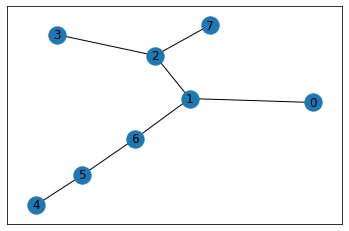

In [2]:
goal = 7
import networkx as nx #library yang digunakan
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G) #posisi
nx.draw_networkx_nodes(G,pos) #titik
nx.draw_networkx_edges(G,pos) #garisnya
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
MATRIX_SIZE = 8 #MAKSIMUM LANGKAH AGENT
#membuat titik titik waal menjadi matriks 8 * 8
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
print(R)
R *= -1
print(R)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]
[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


In [4]:
# mendapatkan pion 100 kalau tercapai 0 kalao tidak tercapai
for point in points_list:
    
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        #reverse of point
        R[point[::-1]] = 0
    print(points_list)

R[goal, goal] = 100
R

[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]
[(0, 1), (1, 6), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

#Aksi yang akan diambil dari vector
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#Mesin memutuskan untuk mesin selanjutnya
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

#menyimpan hasil dari langkah yang diambil
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 180.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 180.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 180.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 0.0
Score: 315.55555555555554
max_value 144.0
Score: 315.55555555555554
max_value 180.0
Score: 315.55555555555554
max_value 144.0
Score: 315.5555

Score: 962.5357072025846
max_value 399.9468308801687
Score: 962.5383660119926
max_value 499.93353860021085
Score: 962.5416895237526
max_value 204.73353860021084
Score: 962.5416895237526
max_value 255.91692325026352
Score: 962.5416895237526
max_value 499.9468308801687
Score: 962.5187567939014
max_value 399.9468308801687
Score: 962.5187567939014
max_value 163.78683088016868
Score: 962.5187567939014
max_value 399.9468308801687
Score: 962.5187567939014
max_value 319.95746470413496
Score: 962.5310202262343
max_value 399.9468308801687
Score: 962.5463495166505
max_value 319.95746470413496
Score: 962.5586129489834
max_value 399.9468308801687
Score: 962.5586129489834
max_value 255.96597176330798
Score: 962.5684236948497
max_value 319.95746470413496
Score: 962.5806871271826
max_value 399.9468308801687
Score: 962.5806871271826
max_value 163.78683088016868
Score: 962.5806871271826
max_value 319.95746470413496
Score: 962.5929505595155
max_value 319.95746470413496
Score: 962.5929505595155
max_value 

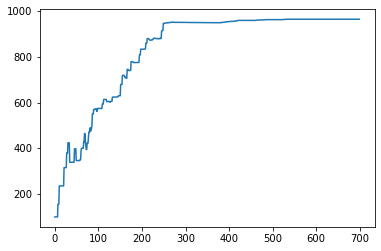

In [6]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()